In [1]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Load Preprocessed Data:

In [2]:
import joblib
X_train_scaled = joblib.load('../saved_models/X_train_scaled.pkl')
X_test_scaled = joblib.load('../saved_models/X_test_scaled.pkl')
y_train = joblib.load('../saved_models/y_train.pkl')
y_test = joblib.load('../saved_models/y_test.pkl')
scaler = joblib.load('../saved_models/scaler.pkl')


#### 2. Establish a Baseline:

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

In [4]:
y_pred = logreg.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.945

Confusion Matrix:
 [[ 19   1   1]
 [  2   2   6]
 [  1   0 168]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.67      0.20      0.31        10
           2       0.96      0.99      0.98       169

    accuracy                           0.94       200
   macro avg       0.83      0.70      0.72       200
weighted avg       0.94      0.94      0.93       200



#### Observation :

The initial Logistic Regression model struggles significantly with the 'Pre-Diabetic' class (label 1), which is the smallest class. The low recall means the model fails to identify most of the actual pre-diabetic patients. This highlights the challenge of the class imbalance and is why we must evaluate more powerful models and use metrics like the weighted F1-score."

#### 3. Train Multiple Models:

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC                   
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "SVC": SVC(kernel='rbf', probability=True),  # probability=True to enable predict_proba
    "KNeighborsClassifier": KNeighborsClassifier()
}

# Binarize targets for ROC AUC
classes = np.unique(y_train)
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # For ROC AUC, get predicted probabilities if available
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train_scaled)
        y_test_proba = model.predict_proba(X_test_scaled)
    elif hasattr(model, "decision_function"):
        # Some models provide decision_function instead
        y_train_proba = model.decision_function(X_train_scaled)
        y_test_proba = model.decision_function(X_test_scaled)
    else:
        y_train_proba = None
        y_test_proba = None
    
    # Calculate metrics
    print(model_name)
    
    # Training set metrics
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_score(y_train, y_train_pred)))
    print('- F1 score: {:.4f}'.format(f1_score(y_train, y_train_pred, average='weighted')))
    print('- Precision: {:.4f}'.format(precision_score(y_train, y_train_pred, average='weighted')))
    print('- Recall: {:.4f}'.format(recall_score(y_train, y_train_pred, average='weighted')))
    
    if y_train_proba is not None:
        roc_train = roc_auc_score(y_train_bin, y_train_proba, average='weighted', multi_class='ovr')
        print('- Roc Auc Score: {:.4f}'.format(roc_train))
    else:
        print('- Roc Auc Score: Not available (no predict_proba or decision_function)')
    
    print('----------------------------------')
    
    # Test set metrics
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(accuracy_score(y_test, y_test_pred)))
    print('- F1 score: {:.4f}'.format(f1_score(y_test, y_test_pred, average='weighted')))
    print('- Precision: {:.4f}'.format(precision_score(y_test, y_test_pred, average='weighted')))
    print('- Recall: {:.4f}'.format(recall_score(y_test, y_test_pred, average='weighted')))
    
    if y_test_proba is not None:
        roc_test = roc_auc_score(y_test_bin, y_test_proba, average='weighted', multi_class='ovr')
        print('- Roc Auc Score: {:.4f}'.format(roc_test))
    else:
        print('- Roc Auc Score: Not available (no predict_proba or decision_function)')
    
    print('='*35, '\n')


Logistic Regression
Model performance for Training set
- Accuracy: 0.9200
- F1 score: 0.9121
- Precision: 0.9118
- Recall: 0.9200
- Roc Auc Score: 0.9809
----------------------------------
Model performance for Test set
- Accuracy: 0.9450
- F1 score: 0.9335
- Precision: 0.9352
- Recall: 0.9450
- Roc Auc Score: 0.9901

Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9900
- F1 score: 0.9898
- Precision: 0.9901
- Recall: 0.9900
- Roc Auc Score: 0.9677

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9950
- F1 score: 0.9949
- Precision: 0.9950
- Recall: 0.9950
- Roc Auc Score: 0.9996

Gradient Boost
Model performance for Training set
- 

#### Observation :
The initial results for the Decision Tree and Random Forest models show a training accuracy of 100%. This indicates that the models are overfitting—they have memorized the training data perfectly but may not generalize well to new, unseen data. The excellent test scores (0.99) are promising, but hyperparameter tuning is essential to control this overfitting and build a more robust model.

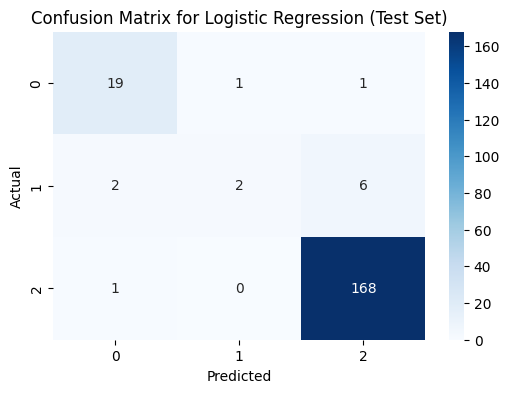

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict with Logistic Regression as example
y_pred = models['Logistic Regression'].predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression (Test Set)')
plt.show()


In [8]:
''' 
CLASS
2    844
0    103
1     53
Name: count, dtype: int64
'''

' \nCLASS\n2    844\n0    103\n1     53\nName: count, dtype: int64\n'

#### 5. Hyperparameter Tuning:

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd
# Parameter grids (customize as needed)
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 10, 15, None],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split": [2, 8, 15]
}

gb_params = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

svc_params = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

# Models with params
randomcv_models = [
    ("Random Forest", RandomForestClassifier(), rf_params),
    ("Gradient Boost", GradientBoostingClassifier(), gb_params),
    ("SVC", SVC(probability=True), svc_params)  # probability=True needed for roc_auc_score
]


In [10]:
#Define models and create lists to store results
randomcv_models = [
    ("Random Forest", RandomForestClassifier(random_state=42), rf_params),
    ("Gradient Boost", GradientBoostingClassifier(random_state=42), gb_params),
    ("SVC", SVC(probability=True, random_state=42), svc_params)
]

model_performance = []
best_estimators = {}

##Loop through models, perform RandomizedSearchCV, and evaluate 
for name, model, params in randomcv_models:
    print(f"---------- Tuning Hyperparameters for {name} ----------")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=20,
        cv=3,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train_scaled, y_train)

    # Store the best estimator found during the search
    best_estimators[name] = random_search.best_estimator_

    # Evaluate the best estimator on the test set
    y_test_pred = random_search.best_estimator_.predict(X_test_scaled)
    y_test_proba = random_search.best_estimator_.predict_proba(X_test_scaled)

    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    roc_auc = roc_auc_score(y_test_bin, y_test_proba, average='weighted', multi_class='ovr')

    model_performance.append({
        'Model': name,
        'Test Accuracy': accuracy,
        'Test F1 Score': f1,
        'Test ROC AUC': roc_auc
    })
    print(f"Evaluation for {name} on Test Set: F1 Score = {f1:.4f}, ROC AUC = {roc_auc:.4f}\n")



---------- Tuning Hyperparameters for Random Forest ----------
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

Evaluation for Random Forest on Test Set: F1 Score = 0.9898, ROC AUC = 0.9992

---------- Tuning Hyperparameters for Gradient Boost ----------
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/user/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Evaluation for Gradient Boost on Test Set: F1 Score = 0.9898, ROC AUC = 0.9967

---------- Tuning Hyperparameters for SVC ----------
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/user/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Evaluation for SVC on Test Set: F1 Score = 0.9523, ROC AUC = 0.9922



/home/user/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
results_summary = pd.DataFrame(model_performance)
print("--- Model Performance Summary ---")
print(results_summary)

#Find the best model's name based on the highest ROC AUC score
best_model_name = results_summary.loc[results_summary['Test ROC AUC'].idxmax(), 'Model']
print(f"\n🏆 The best performing model is: {best_model_name}")

# Retrieve the best model OBJECT from our dictionary using the best model NAME
final_model = best_estimators[best_model_name]

# Save the model object
joblib.dump(final_model, '../saved_models/final_model.pkl')





--- Model Performance Summary ---
            Model  Test Accuracy  Test F1 Score  Test ROC AUC
0   Random Forest          0.990       0.989837      0.999167
1  Gradient Boost          0.990       0.989837      0.996705
2             SVC          0.955       0.952299      0.992150

🏆 The best performing model is: Random Forest


['../saved_models/final_model.pkl']